# Introduction is WIP

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# Download Datasets
# download.file(url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "data/processed.cleveland.data")
# download.file(url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", destfile = "data/processed.hungarian.data")
# download.file(url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", destfile = "data/processed.switzerland.data")
# download.file(url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", destfile = "data/processed.va.data")

In [3]:
# Load In Each Dataset
cleveland_data <- read.csv("data/processed.cleveland.data", header = FALSE, na.strings = "?")
cleveland_data <- mutate(cleveland_data, location = "Cleveland")
cleveland_data

hungarian_data <- read.csv("data/processed.hungarian.data", header = FALSE, na.strings = "?")
hungarian_data <- mutate(hungarian_data, location = "Hungary")
hungarian_data

switzerland_data <- read.csv("data/processed.switzerland.data", header = FALSE, na.strings = "?")
switzerland_data <- mutate(switzerland_data, location = "Switzerland")
switzerland_data

va_data <- read.csv("data/processed.va.data", header = FALSE, na.strings = "?")
va_data <- mutate(va_data, location = "VA")
va_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,Cleveland
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Cleveland
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0,Cleveland


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,Hungary
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0,Hungary
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0,Hungary
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1,Hungary
58,0,2,180,393,0,0,110,1,1,2,NA,7,1,Hungary
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1,Hungary


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,1,Switzerland
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,1,Switzerland
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,3,Switzerland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,NA,2,114,0,1.6,2,2,NA,0,Switzerland
73,0,3,160,0,0,1,121,0,0.0,1,NA,3,1,Switzerland
74,1,2,145,0,NA,1,123,0,1.3,1,NA,NA,1,Switzerland


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
63,1,4,140,260,0,1,112,1,3.0,2,NA,NA,2,VA
44,1,4,130,209,0,1,127,0,0.0,NA,NA,NA,0,VA
60,1,4,132,218,0,1,140,1,1.5,3,NA,NA,2,VA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,VA
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,VA
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,VA


In [4]:
# Merge Datasets
raw_data <- rbind(cleveland_data, hungarian_data, switzerland_data, va_data)
raw_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,VA
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,VA
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,VA


In [5]:
# Modify Column Names
names(raw_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num", "location")

# Interpret columns as factors
# Mappings acquired from https://archive.ics.uci.edu/ml/datasets/Heart+Disease
heart_data <- raw_data |> mutate(
    sex = as.factor(sex),
    cp = as.factor(cp),
    fbs = as.logical(fbs),
    restecg = as.factor(restecg),
    exang = as.logical(exang),
    slope = as.factor(slope),
    ca = as.factor(ca),
    thal = as.factor(thal),
    num = as.factor(num > 0)
)
# I found this hacky solution online.
# https://stackoverflow.com/questions/13613913/how-do-i-convert-certain-columns-of-a-data-frame-to-become-factors
levels(heart_data$sex)<- c("female", "male")
levels(heart_data$cp) <- c("typical angina","atypical angina", "non-anginal pain", "asymptomatic")
levels(heart_data$restecg) <- c("normal","ST-T wave abnormality","hypertrophy")
levels(heart_data$slope) <- c("upsloping","flat","downsloping")
levels(heart_data$thal) <- c("normal", "fixed defect","reversable defect")
heart_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<lgl>,<fct>,<dbl>,<lgl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
63,male,typical angina,145,233,TRUE,hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,FALSE,Cleveland
67,male,asymptomatic,160,286,FALSE,hypertrophy,108,TRUE,1.5,flat,3,normal,TRUE,Cleveland
67,male,asymptomatic,120,229,FALSE,hypertrophy,129,TRUE,2.6,flat,2,reversable defect,TRUE,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,male,asymptomatic,122,223,TRUE,ST-T wave abnormality,100,FALSE,0,NA,NA,fixed defect,TRUE,VA
58,male,asymptomatic,NA,385,TRUE,hypertrophy,NA,NA,NA,NA,NA,NA,FALSE,VA
62,male,atypical angina,120,254,FALSE,hypertrophy,93,TRUE,0,NA,NA,NA,TRUE,VA


In [6]:
set.seed(1000)
#Select only numerical variables
heart_num <- heart_data |>
    select(age, trestbps, chol, thalach, oldpeak, num)
#Split into 75% train and 25% test 
heart_split <- initial_split(heart_num, prop=0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split) 
heart_training

,age,trestbps,chol,thalach,oldpeak,num
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,37,130,250,187,3.5,FALSE
5,41,130,204,172,1.4,FALSE
6,56,120,236,178,0.8,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮
916,54,127,333,154,0,TRUE
918,55,122,223,100,0,TRUE
920,62,120,254,93,0,TRUE


In [7]:
options(repr.plot.height=7, repr.plot.width = 6)
# Distribution of target class
class_dist <- heart_training |>
    group_by(num) |>
    summarize(n=n())
class_dist

num,n
<fct>,<int>
FALSE,308
TRUE,381


In [8]:
# Number of observations with missing data
num_na <- heart_training |>
    filter(is.na(trestbps) | is.na(chol) | is.na(thalach) | is.na(oldpeak))|>
    nrow()
num_na

[1] 66

In [9]:
# Average value of each predictor
var_means <- heart_training |>
    summarize(across(age:oldpeak, mean, na.rm=TRUE))
var_means

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
53.55588,132.5532,197.8817,137.6836,0.8744582


Warning message:
“Removed 40 rows containing non-finite values (stat_bin).”


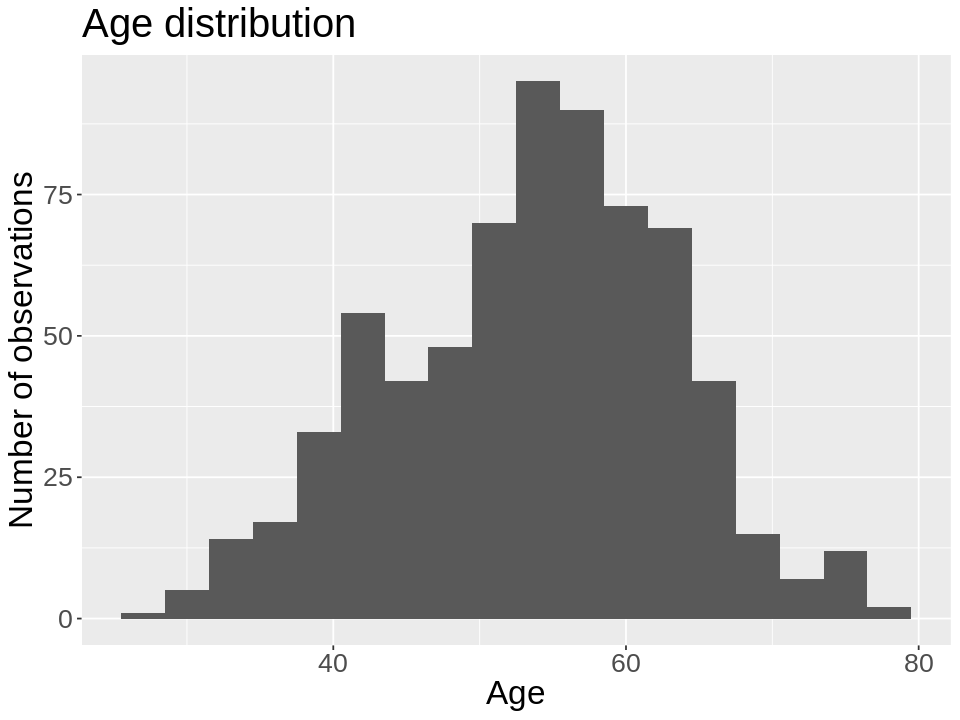

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 21 rows containing non-finite values (stat_bin).”


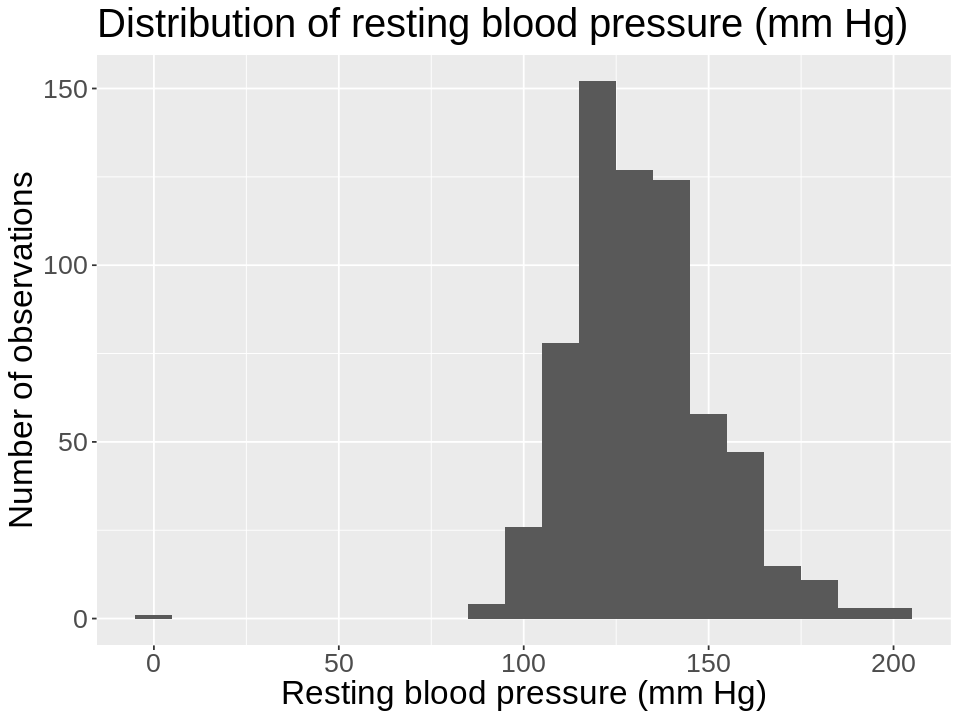

Warning message:
“Removed 38 rows containing non-finite values (stat_bin).”


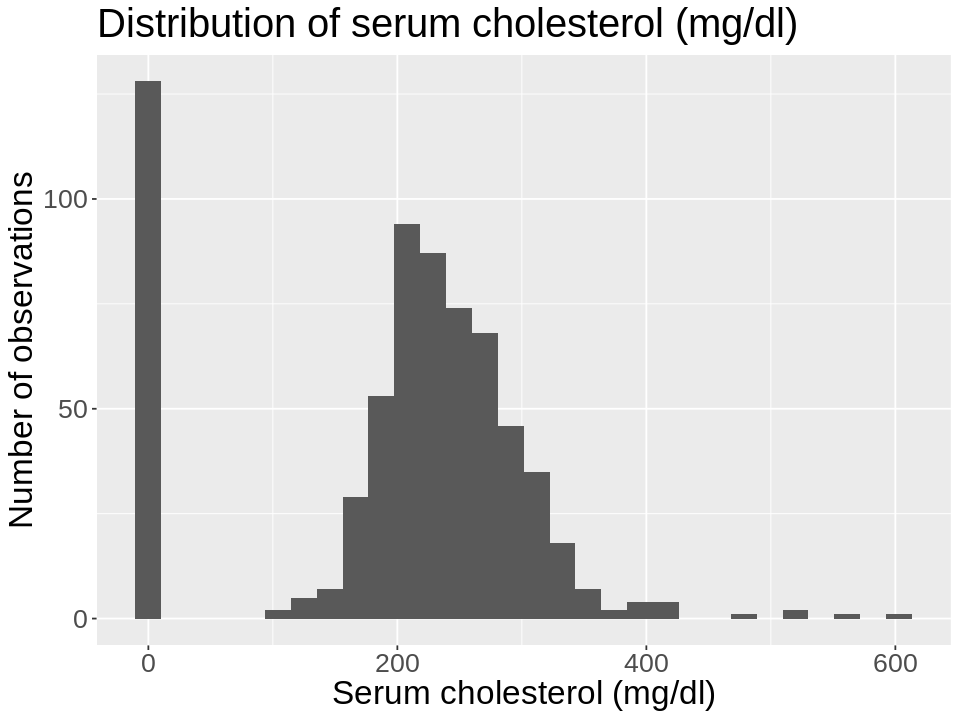

Warning message:
“Removed 43 rows containing non-finite values (stat_bin).”


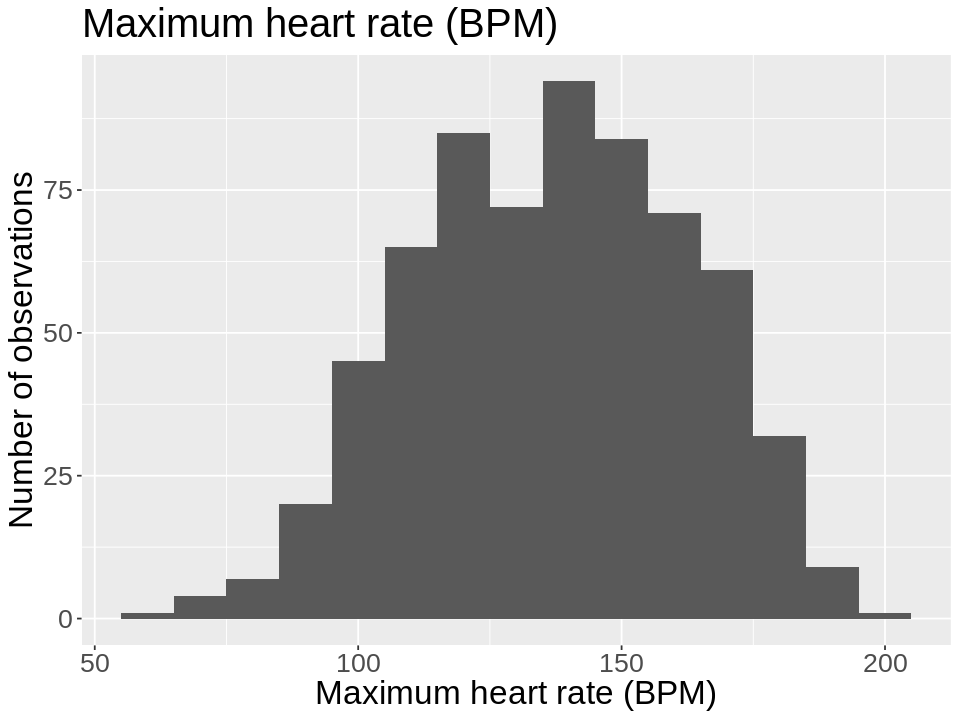

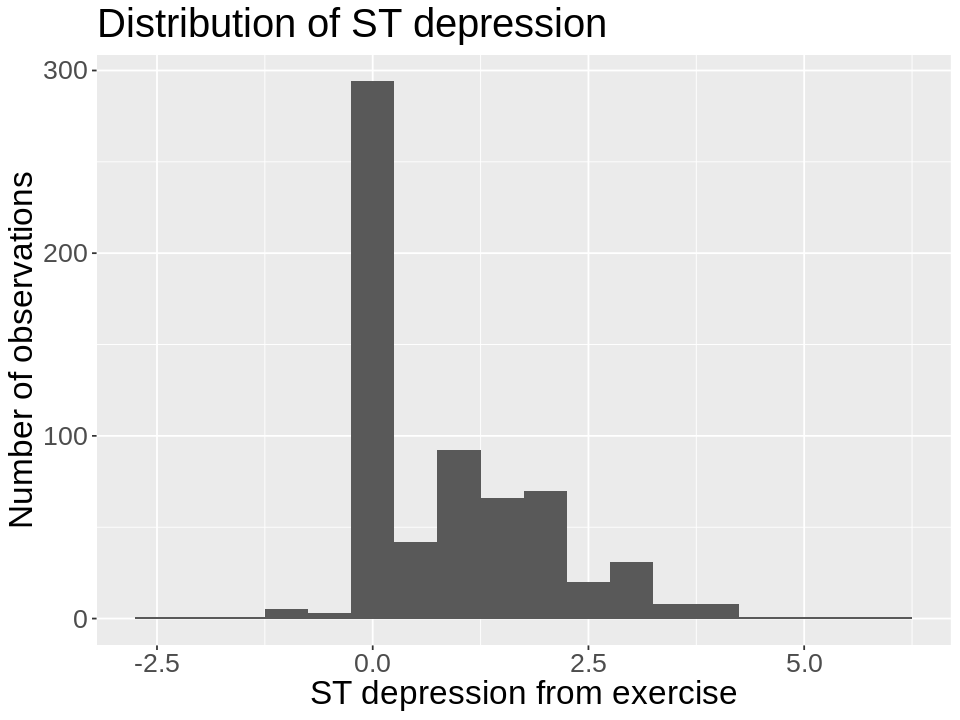

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)
# Distributions of predictor variables
age_dist <- ggplot(heart_training, aes(x=age)) +
    geom_histogram(binwidth=3)+
    labs(x="Age", y="Number of observations")+
    theme(text=element_text(size=20))+
    ggtitle("Age distribution")
age_dist

trestbps_plot <- ggplot(heart_training, aes(x=trestbps)) +
    geom_histogram(binwidth=10)+
    labs(x="Resting blood pressure (mm Hg)", y="Number of observations")+
    theme(text=element_text(size=20))+
    ggtitle("Distribution of resting blood pressure (mm Hg)")
trestbps_plot

chol_plot <- ggplot(heart_training, aes(x=chol)) +
    geom_histogram()+
    labs(x="Serum cholesterol (mg/dl)", y="Number of observations")+
    theme(text=element_text(size=20))+
    ggtitle("Distribution of serum cholesterol (mg/dl)")
chol_plot

thalach_plot <- ggplot(heart_training, aes(x=thalach)) +
    geom_histogram(binwidth=10)+
    labs(x="Maximum heart rate (BPM)", y="Number of observations")+
    theme(text=element_text(size=20))+
    ggtitle("Maximum heart rate (BPM)")
thalach_plot

oldpeak_plot <- ggplot(heart_training, aes(x=oldpeak)) +
    geom_histogram(binwidth=0.5)+
    labs(x="ST depression from exercise", y="Number of observations")+
    theme(text=element_text(size=20))+
    ggtitle("Distribution of ST depression")
oldpeak_plot

Warning message:
“Removed 38 rows containing missing values (geom_point).”


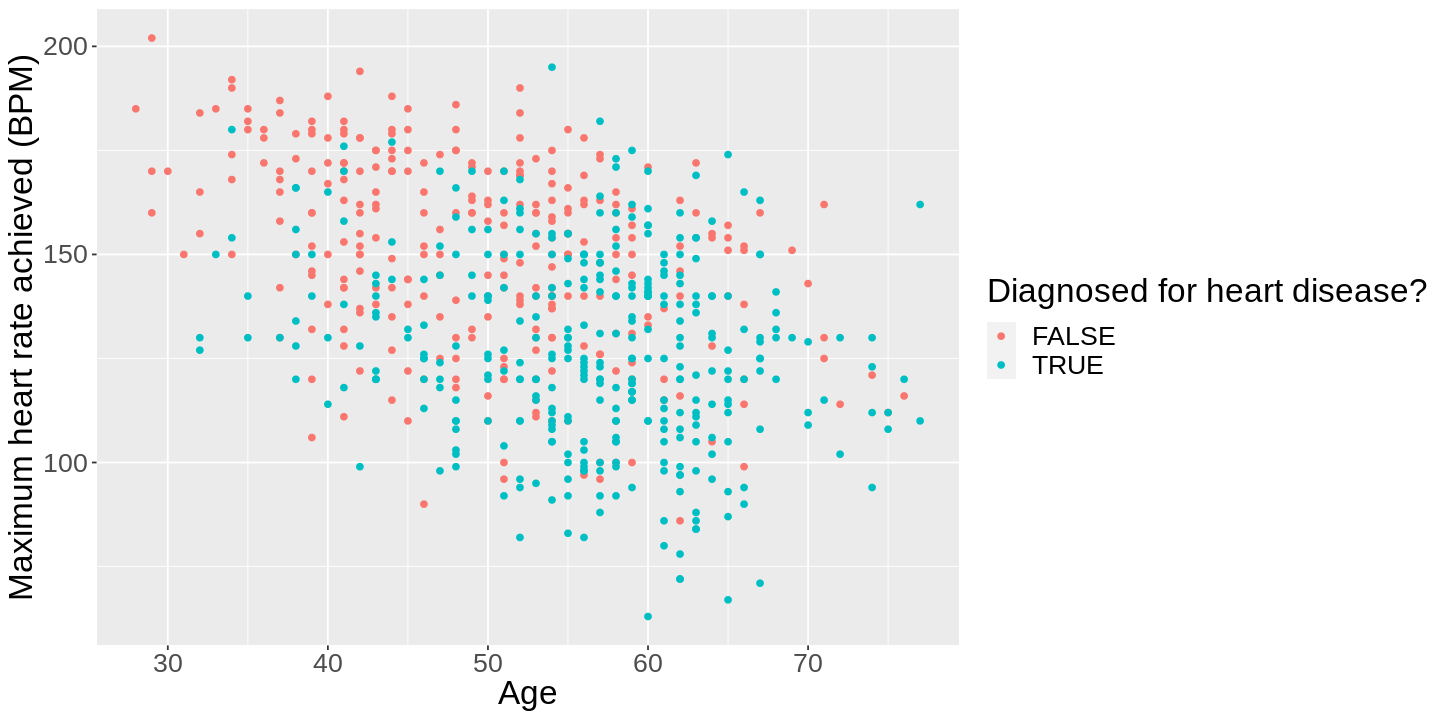

In [16]:
options(repr.plot.width=12, repr.plot.height=6)
age_plot <- ggplot(heart_training, aes(x=age, y=thalach, color=num)) +
    geom_point()+
    labs(x="Age", y="Maximum heart rate achieved (BPM)", color="Diagnosed for heart disease?")+
    theme(text=element_text(size=20))
age_plot